In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)


68

In [6]:
68*32

2176

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 1 1 0 0 1 2 0 1 0 2 0 0 2 2 0 0 1 2 0 1 1 0 0 1 0 1 0]


(32, 256, 256, 3)


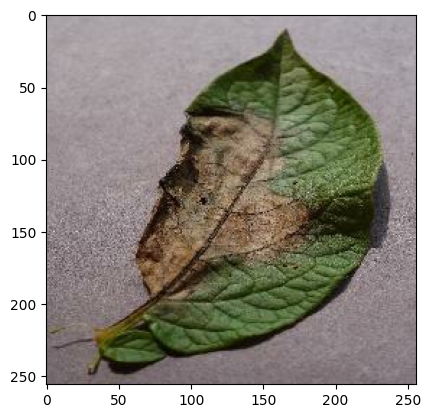

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch.shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)


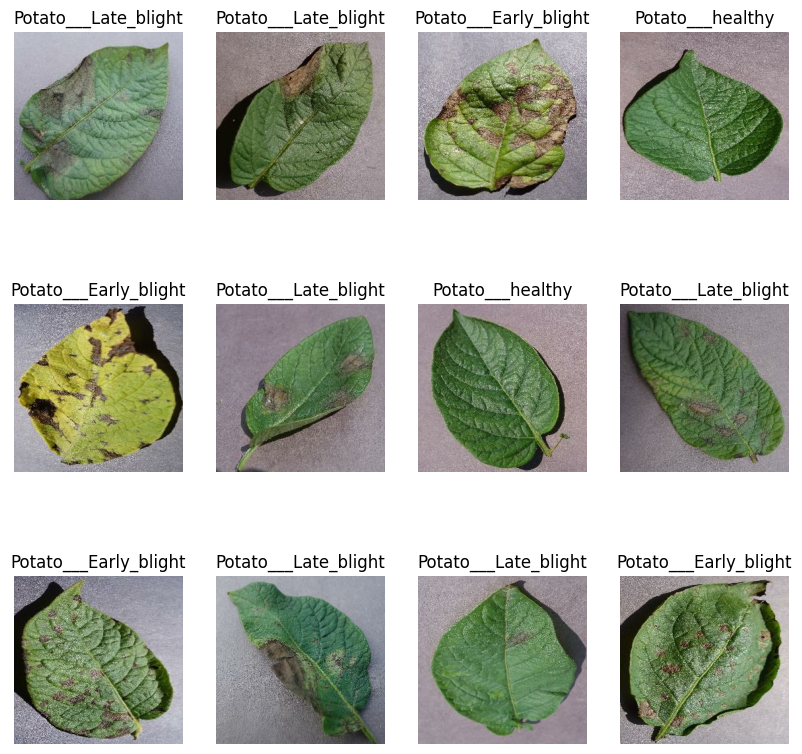

In [27]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        print(image_batch.shape)

In [28]:
len(dataset)


68

In [ ]:
80% ==> training
20% ==> 10% validation,10%test

In [30]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [54]:
train_ds=dataset.take(54)
len(train_Ds)

54

In [41]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [33]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [34]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [35]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [55]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size  =  int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [56]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [57]:
len(train_ds)

54

In [58]:
len(val_ds)

6

In [50]:
len(test_ds)

8

In [59]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [60]:
resize_and_rescale=tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [64]:
data_augumentation=tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2)
    ]
)

In [ ]:
Data set is pre processed and we are ready to build the model

In [ ]:
Using CNN

In [74]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential(
    [
        resize_and_rescale,
        data_augumentation,
        layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(n_classes,activation = 'softmax'),
    ]
)
model.build(input_shape=input_shape)

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (256, 256, 3)             0         
                                                                 
 sequential_3 (Sequential)   (256, 256, 3)             0         
                                                                 
 conv2d_36 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [76]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [79]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 131s 2s/step - loss: 0.9404 - accuracy: 0.4664 - val_loss: 0.8803 - val_accuracy: 0.5469
Epoch 2/50
54/54 [==============================] - 124s 2s/step - loss: 0.8876 - accuracy: 0.5145 - val_loss: 0.8652 - val_accuracy: 0.5885
Epoch 3/50
54/54 [==============================] - 124s 2s/step - loss: 0.6718 - accuracy: 0.7066 - val_loss: 0.6392 - val_accuracy: 0.7760
Epoch 4/50
54/54 [==============================] - 125s 2s/step - loss: 0.5750 - accuracy: 0.7616 - val_loss: 0.5293 - val_accuracy: 0.7917
Epoch 5/50
54/54 [==============================] - 124s 2s/step - loss: 0.4361 - accuracy: 0.8212 - val_loss: 0.5900 - val_accuracy: 0.7188
Epoch 6/50
54/54 [==============================] - 123s 2s/step - loss: 0.4088 - accuracy: 0.8339 - val_loss: 0.5053 - val_accuracy: 0.7969
Epoch 7/50
54/54 [==============================] - 126s 2s/step - loss: 0.2700 - accuracy: 0.8924 - val_loss: 0.4756 - val_accuracy: 0.8021
Epoch 8/50
54

In [81]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 245ms/step - loss: 0.0259 - accuracy: 0.9883


In [82]:
scores


[0.025905966758728027, 0.98828125]

In [83]:
history

In [84]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

 First Image to predict 
  Image's actual label:  Potato___Early_blight
1/1 [==============================] - 0s 395ms/step
Predicted Label:  Potato___Early_blight


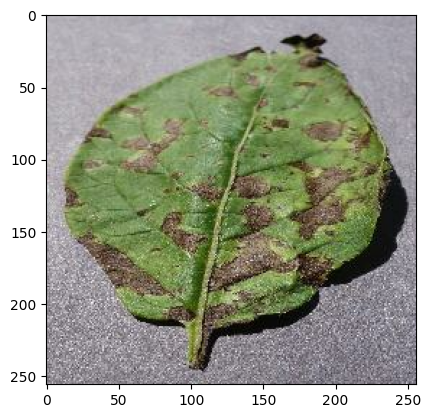

In [109]:
import numpy as np
for images_batch, labels_batch in  test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0].numpy()
    print(" First Image to predict ")
    plt.imshow(first_image)
    print("  Image's actual label: ",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [108]:
np.argmax([1.0453814e-06,9.9999893e-01,2.1420983e-12])

1

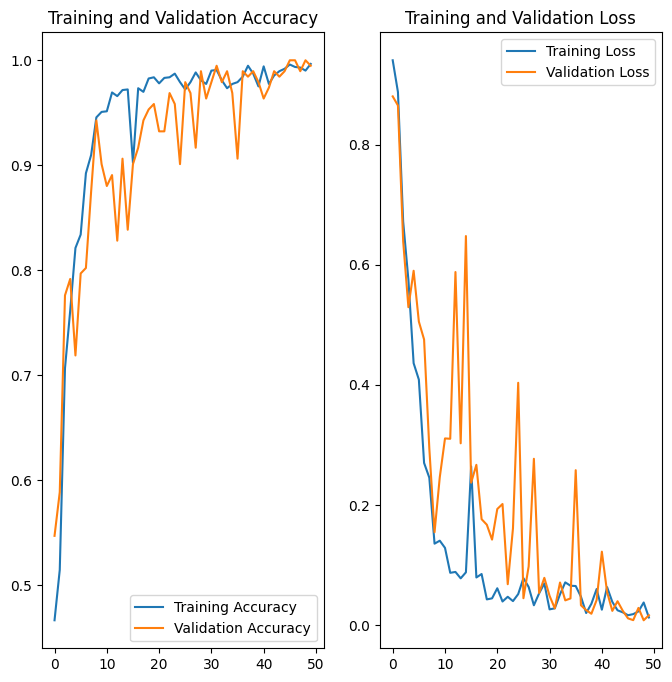

In [91]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1),
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2),
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [120]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a Batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 40ms/step


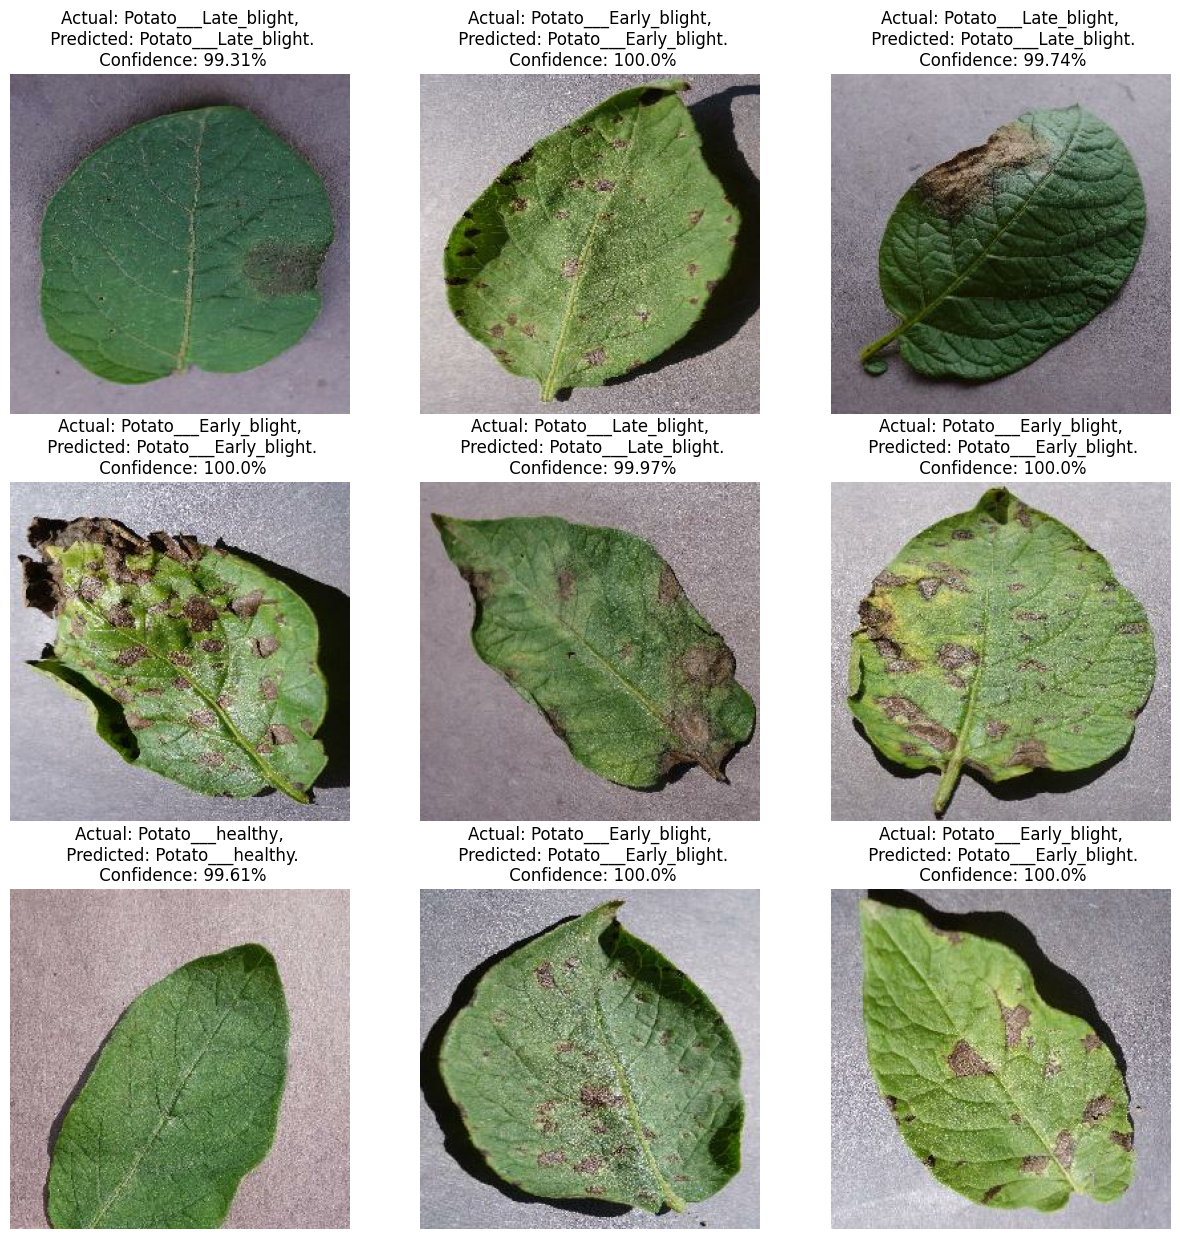

In [122]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [127]:
import os

# Check if the directory exists
if not os.path.exists('./models'):
    # If not, create the directory
    os.makedirs('./models')

# Now you can save your model
model.save("./models/model_version")

INFO:tensorflow:Assets written to: ./models/model_version\assets


INFO:tensorflow:Assets written to: ./models/model_version\assets
